<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/HITL_XAI_Pancreas_RF_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HTIL_XAI_Pancreas_RF_min**

author: jose.bobes at udc.es

# Importing required libraries

In [1]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import re
print('re: {}'.format(re.__version__))

import graphviz
print('graphviz: {}'.format(graphviz.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
numpy: 1.23.5
re: 2.2.1
graphviz: 0.20.1
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# Cleaning the Pancreas dataset

In [2]:
# 1. Set the FEATURE_NAMES to be used to train the model, except for the therapy_type which is the target.
features = ['ajcc_pathologic_stage',
            'ajcc_pathologic_t',
            'ajcc_pathologic_m',
            'ajcc_pathologic_n',
            'age_at_index',
            #'other_dx',
            #'gender',
            #'race',
            #'ethnicity',
            #'adenocarcinoma_invasion',
            #'histological_type',
            #'person_neoplasm_cancer_status',
            #'year_of_initial_pathologic_diagnosis',
            #'initial_pathologic_diagnosis_method',
            #'surgery_performed_type',
            #'number_of_lymphnodes_positive_by_he',
            #'number_of_lymphnodes_positive_by_ihc',
            #'neoplasm_histologic_grade',
            #'maximum_tumor_dimension',
            #'residual_tumor',
            #'history_of_diabetes',
            #'family_history_of_cancer',
            #'radiation_therapy',
            #'postoperative_rx_tx',
            #'primary_therapy_outcome_success',
            #'new_tumor_events',
            #'days_to_new_tumor_event_after_initial_treatment',
            'therapy_type',
            #'tx_on_clinical_trial',
            #'drug_name',
            #'tobacco_smoking_history',
            #'alcoholic_exposure_category'
]

In [3]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/tcga_paad_datosRecomendados.csv"

dataset = pd.read_csv(url, sep=';', usecols=features, encoding = "ISO-8859-1")
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

print(dataset.shape)
print(dataset.head())

(185, 6)
  ajcc_pathologic_stage ajcc_pathologic_t ajcc_pathologic_n ajcc_pathologic_m  \
0             Stage IIB                T3                N1                MX   
1             Stage IIB                T3                N1                M0   
2              Stage IB                T2                N0                MX   
3             Stage IIA                T3                N0                M0   
4             Stage IIA                T3                N0                M0   

   age_at_index  therapy_type  
0            77  Chemotherapy  
1            67           NaN  
2            59           NaN  
3            61  Chemotherapy  
4            65  Chemotherapy  


In [4]:
# 3. Show Datatypes
for column, dtype in zip(dataset.columns, dataset.dtypes):
    print(f"{column}:{dtype}")

ajcc_pathologic_stage:object
ajcc_pathologic_t:object
ajcc_pathologic_n:object
ajcc_pathologic_m:object
age_at_index:int64
therapy_type:object


In [5]:
# 4. Missing Values/ Null Values
print(dataset.isnull().sum())

ajcc_pathologic_stage     3
ajcc_pathologic_t         1
ajcc_pathologic_n         1
ajcc_pathologic_m         0
age_at_index              0
therapy_type             64
dtype: int64


In [6]:
# 5. Fill in the missing values
#dataset.days_to_death = dataset.days_to_death.fillna(18250) # Asignamos un valor muy alto (50 años)
dataset.ajcc_pathologic_stage = dataset.ajcc_pathologic_stage.fillna('Stage 0')
dataset.ajcc_pathologic_t = dataset.ajcc_pathologic_t.fillna('TX')
dataset.ajcc_pathologic_m = dataset.ajcc_pathologic_m.fillna('MX')
dataset.ajcc_pathologic_n = dataset.ajcc_pathologic_n.fillna('NX')
#dataset.race = dataset.race.fillna('Unknown')
#dataset.ethnicity = dataset.ethnicity.fillna('Unknown')
#dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
dataset.therapy_type = dataset.therapy_type.fillna('Other')
#dataset.number_of_lymphnodes_positive_by_he = dataset.number_of_lymphnodes_positive_by_he.fillna(0)
#dataset.number_of_lymphnodes_positive_by_ihc = dataset.number_of_lymphnodes_positive_by_ihc.fillna(0)
#dataset.days_to_new_tumor_event_after_initial_treatment = dataset.days_to_new_tumor_event_after_initial_treatment.fillna(99999)
#dataset.tx_on_clinical_trial = dataset.tx_on_clinical_trial.fillna('Unknown')
#dataset.drug_name = dataset.drug_name.fillna('None')
#dataset.tobacco_smoking_history = dataset.tobacco_smoking_history.fillna(0)
#dataset.alcoholic_exposure_category = dataset.alcoholic_exposure_category.fillna('None')

#dataset.histological_type = dataset.histological_type.fillna('None')
#dataset.person_neoplasm_cancer_status = dataset.person_neoplasm_cancer_status.fillna('Unknown')
#dataset.year_of_initial_pathologic_diagnosis = dataset.year_of_initial_pathologic_diagnosis.fillna(0)
#dataset.initial_pathologic_diagnosis_method = dataset.initial_pathologic_diagnosis_method.fillna('Unknown')
#dataset.surgery_performed_type = dataset.surgery_performed_type.fillna('Unknown')
#dataset.maximum_tumor_dimension = dataset.maximum_tumor_dimension.fillna('Unknown')
#dataset.residual_tumor = dataset.residual_tumor.fillna('Unknown')
#dataset.history_of_diabetes = dataset.history_of_diabetes.fillna('Unknown')
#dataset.family_history_of_cancer = dataset.family_history_of_cancer.fillna('Unknown')
#dataset.radiation_therapy = dataset.radiation_therapy.fillna('Unknown')
#dataset.postoperative_rx_tx = dataset.postoperative_rx_tx.fillna('Unknown')
#dataset.primary_therapy_outcome_success = dataset.primary_therapy_outcome_success.fillna('Unknown')
#dataset.new_tumor_events = dataset.new_tumor_events.fillna('Unknown')

dataset_null = dataset.isnull()
print(dataset.isnull().sum())

ajcc_pathologic_stage    0
ajcc_pathologic_t        0
ajcc_pathologic_n        0
ajcc_pathologic_m        0
age_at_index             0
therapy_type             0
dtype: int64


In [7]:
# 6. Removing Redundancy
count_duplicates = dataset[dataset.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 34


In [8]:
# There are 6 duplicates with the columns selected.
dataset[dataset.duplicated()]

ajcc_pathologic_stage ajcc_pathologic_t ajcc_pathologic_n  \
10              Stage IIB                T3                N1   
42              Stage IIB                T3                N1   
65              Stage IIB                T3                N1   
66              Stage IIB                T3                N1   
68              Stage IIB                T3                N1   
69              Stage IIB                T3                N1   
83              Stage IIB                T3                N1   
84              Stage IIB                T3                N1   
97              Stage IIB                T3                N1   
98              Stage IIB                T3                N1   
101             Stage IIB                T3                N1   
104             Stage IIB                T3                N1   
107             Stage IIB                T3                N1   
114             Stage IIB                T3                N1   
120             Stage IIB                T3                N1   
124             Stage IIB                T3                N1   
127             Stage IIB                T3                N1   
129             Stage IIB                T3                N1   
133             Stage IIB                T3                N1   
139             Stage IIB                T3                N1   
141             Stage IIA                T3                N0   
142             Stage IIB                T3                N1   
145             Stage IIB                T3                N1   
146             Stage IIB                T3                N1   
148             Stage IIB                T3                N1   
153             Stage IIB                T3                N1   
155             Stage IIB                T3                N1   
157             Stage IIB                T3                N1   
161             Stage IIB                T3                N1   
164             Stage IIB                T3                N1   
166             Stage IIB                T3                N1   
167             Stage IIB                T3                N1   
173             Stage IIB                T3                N1   
184             Stage IIB                T3                N1   

    ajcc_pathologic_m  age_at_index  therapy_type  
10                 MX            77  Chemotherapy  
42                 MX            81         Other  
65                 M0            56  Chemotherapy  
66                 MX            50  Chemotherapy  
68                 M0            64  Chemotherapy  
69                 MX            65  Chemotherapy  
83                 MX            59  Chemotherapy  
84                 MX            77  Chemotherapy  
97                 M0            71  Chemotherapy  
98                 MX            76  Chemotherapy  
101                M0            64  Chemotherapy  
104                M0            71  Chemotherapy  
107                M0            70  Chemotherapy  
114                M0            72  Chemotherapy  
120                MX            69  Chemotherapy  
124                M0            56  Chemotherapy  
127                M0            49  Chemotherapy  
129                M0            64  Chemotherapy  
133                M0            49  Chemotherapy  
139                M0            71  Chemotherapy  
141                M0            75  Chemotherapy  
142                M0            72  Chemotherapy  
145                MX            67  Chemotherapy  
146                MX            61         Other  
148                MX            77  Chemotherapy  
153                MX            61  Chemotherapy  
155                MX            76  Chemotherapy  
157                M0            63  Chemotherapy  
161                MX            65         Other  
164                M0            72  Chemotherapy  
166                M0            57  Chemotherapy  
167                MX            75  Chemotherapy  
173         

# Data Preparation

In [9]:
# 1. Simplify Target with only Chemotherapy or Other
dataset['therapy_type'] = dataset['therapy_type'].replace('Hormone Therapy', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Vaccine', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Ancillary', 'Other')

# check that we only get two values: 'Chemotherapy' and 'Other'
dataset['therapy_type'].unique()

array(['Chemotherapy', 'Other'], dtype=object)

In [10]:
# 2. Convert categorical variables into numerical.
# Categorical features need to be transformed before they can be used in a model.

dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage 0', 0)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage I', 1)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IA', 2)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IB', 3)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage II', 4)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIA', 5)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIB', 6)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage III', 7)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IV', 8)

dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('TX', 0)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T1', 1)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T2', 2)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T3', 3)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T4', 4)

dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N0', 0)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1', 1)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1b', 2)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('NX', 3)

dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M0', 0)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M1', 1)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('MX', 2)

In [11]:
# 3. Drop unneeded Features
# Remove therapy_type from the X vector, and keep it as the target.
X = dataset.drop(['therapy_type'], axis=1)
y = dataset['therapy_type']

In [12]:
# 4. Use One-hot encoding for the rest of categorical features. We get a binary variable for each category.
X_encoded = pd.get_dummies(X)

In [13]:
# 5. Split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=0.2,random_state=42)

# Creating a Random Forest model and using SHAP and LIME to explain it

In [14]:
# 1. Get the best possible parameters for a Random Forest
rf_best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6,10]:
        for min_samples_leaf in [5, 10, 20, 30]:
            drf = RandomForestClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            drf.fit(X_train, y_train)
            predicitions = drf.predict(X_test)
            rf_acc = metrics.accuracy_score(y_test, predicitions)
            if rf_acc > rf_best_acc:
                rf_best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                rf_best_acc = rf_acc

print("Random Forest Best Parameters: ", rf_best_params)
print("Random Forest Best Accuracy: ", rf_best_acc)

Random Forest Best Parameters:  criterion: gini, max_depth: 10, min_samples_leaf: 5
Random Forest Best Accuracy:  0.5945945945945946


In [15]:
# 2. Create the Decision Tree model and fit the training data
rf_clf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=2, min_samples_leaf=5)
rf_clf = rf_clf.fit(X_train, y_train)

In [16]:
# 3. Predict over the test data and show accuracy
y_rf_pred = rf_clf.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, y_rf_pred)
print("Random Forrest Tree accuracy: ", rf_acc)

Random Forrest Tree accuracy:  0.5405405405405406


In [17]:
# 4. Show Classification Report
print(metrics.classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

Chemotherapy       0.51      1.00      0.68        18
       Other       1.00      0.11      0.19        19

    accuracy                           0.54        37
   macro avg       0.76      0.55      0.43        37
weighted avg       0.76      0.54      0.43        37



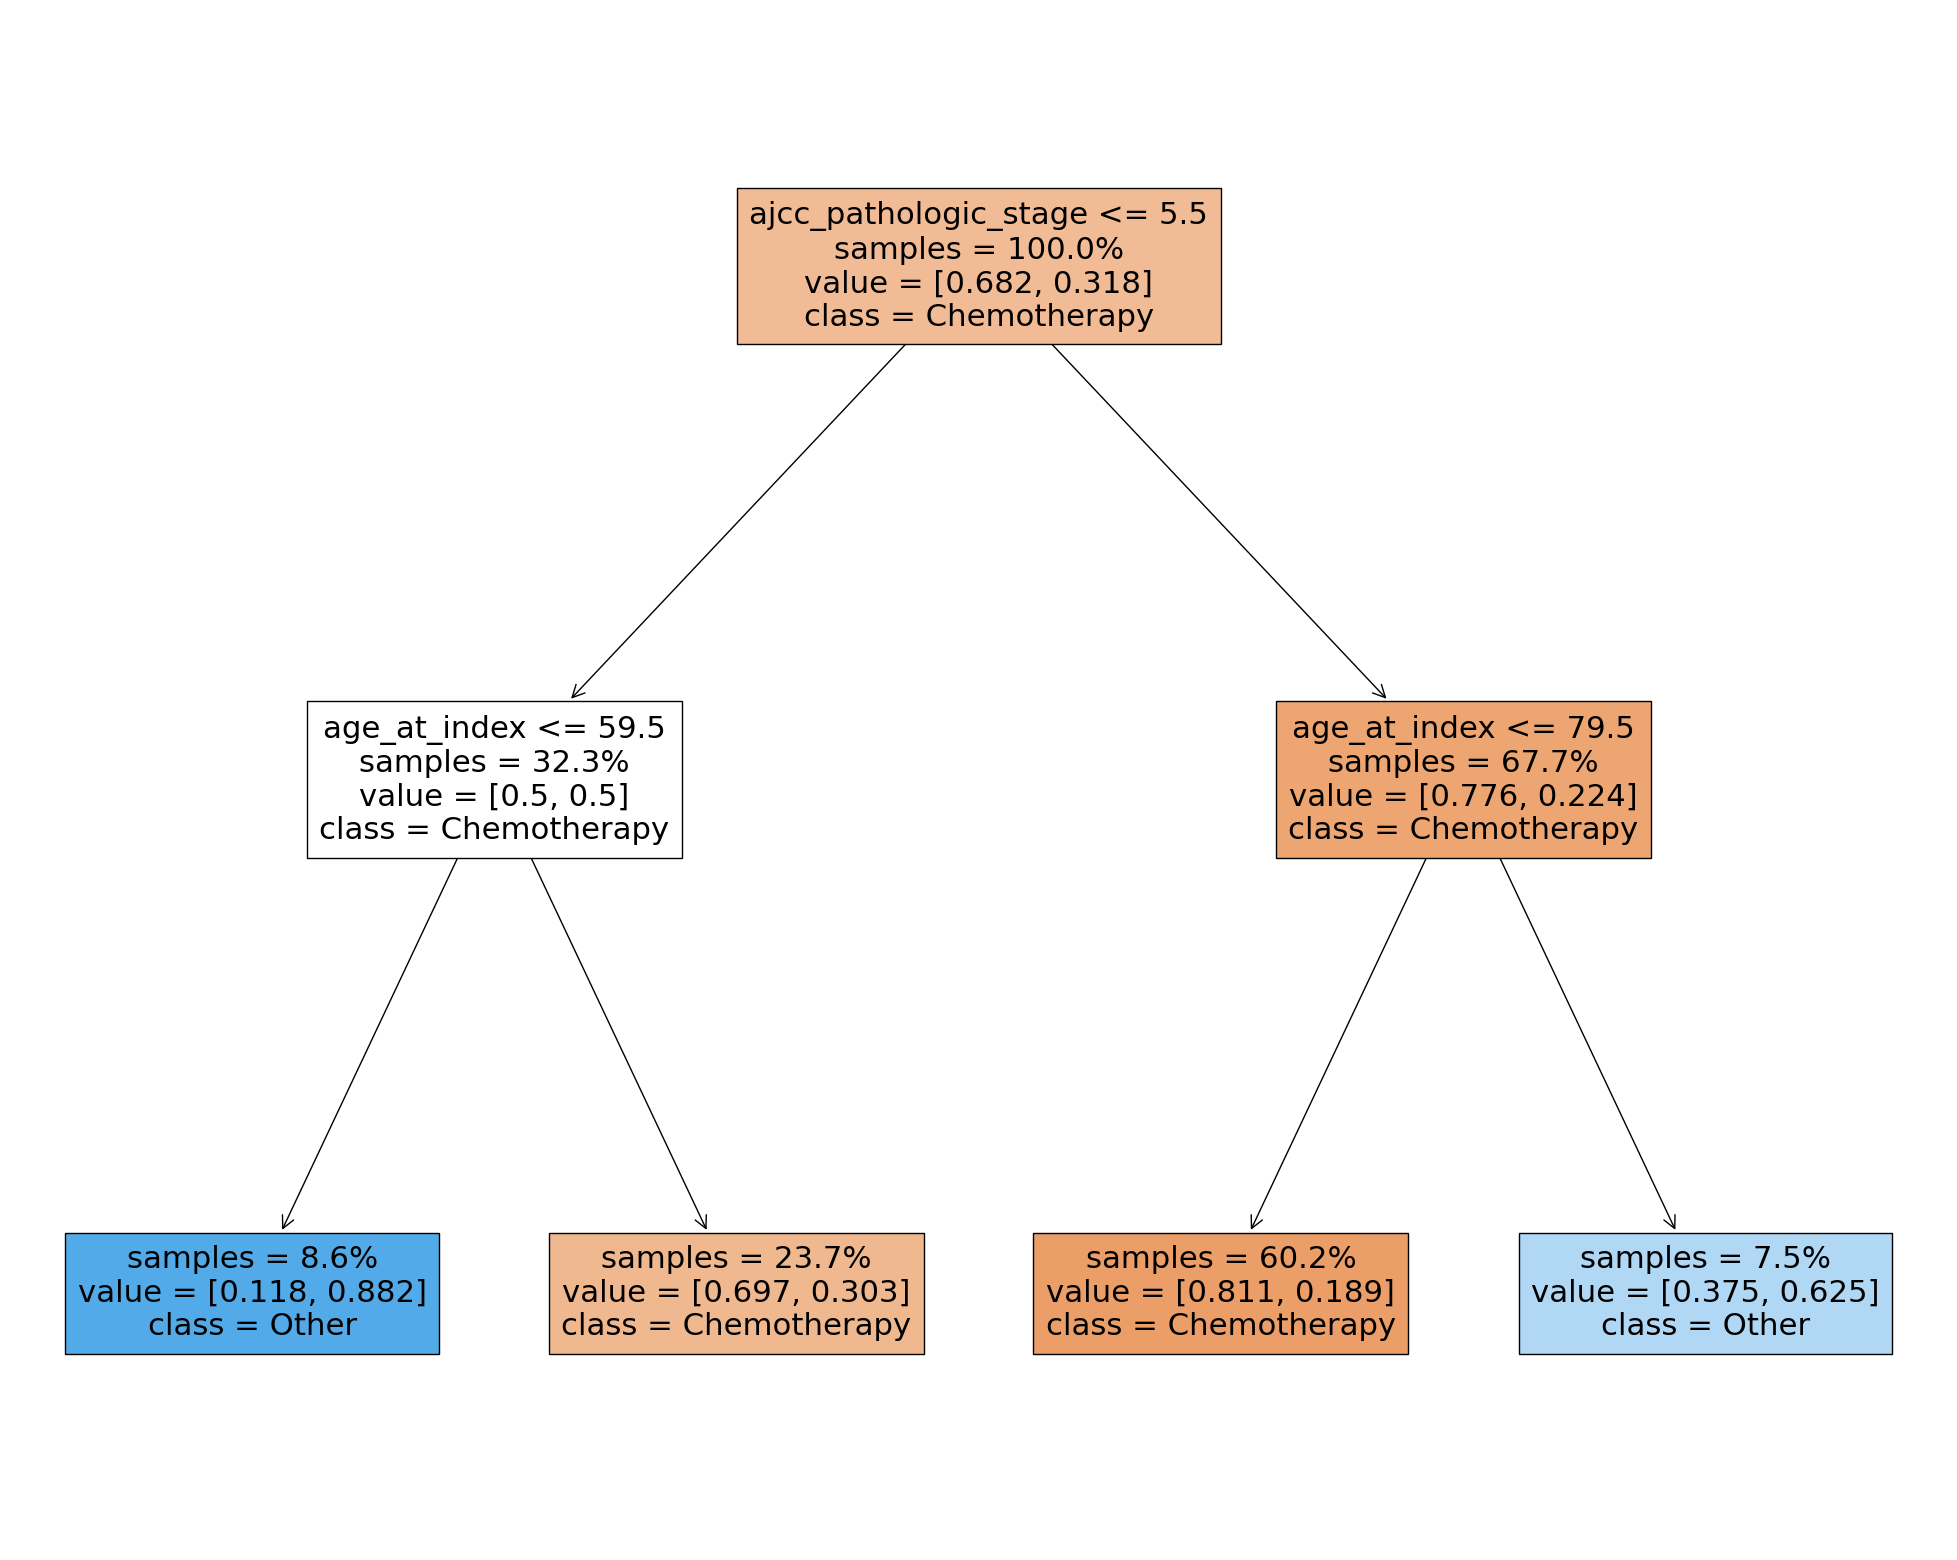

In [18]:
# 5. Visualize the Random Forest decision tree
rf_fig = plt.figure(figsize=((25,20)))
tree.plot_tree(rf_clf.estimators_[0],
            feature_names = X_encoded.columns,
            class_names=['Chemotherapy','Other'],
            impurity=False,
            proportion=True,
            filled=True)
rf_fig.savefig('rf_tree.png')
plt.show()

In [19]:
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf_clf.predict(X_train)))
#print('Precision:', precision_score(y_train, rf_clf.predict(X_train)))
#print('Recall:', recall_score(y_train, rf_clf.predict(X_train)))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf_clf.predict(X_test)))
#print('Precision:', precision_score(y_test, rf_clf.predict(X_test)))
#print('Recall:', recall_score(y_test, rf_clf.predict(X_test)))

Training set metrics:
Accuracy: 0.7162162162162162
Test set metrics:
Accuracy: 0.5405405405405406


The tree representation that we get from the Random Forest makes it difficult to follow the decision the algorithm takes at every node. Integrating an explainability layer into your machine learning models can make them more understandable and trustworthy.

# Permutation Importance

In [20]:
# 1. Install required package
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [21]:
# 2. Get permutation importance data and show weights
rf_perm = PermutationImportance(rf_clf, random_state=42).fit(X_test, y_test)
eli5.show_weights(rf_perm, feature_names = X_encoded.columns.tolist())

# Exaplainability with SHAP

In [22]:
!pip install shap
import shap


In [23]:
# Explain the model's predictions using SHAP
explainerShap = shap.TreeExplainer(rf_clf)

# Compute shap_values for X_test
shap_values = explainerShap.shap_values(X_test)

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

We could see the contribution of each data into the prediction probability. The redder the colour, the higher the value and vice versa. Also, when the value is on the positive side, it contributes to the class 0 prediction result probability and vice versa.

Variable Importance Plot - Global Interpretation


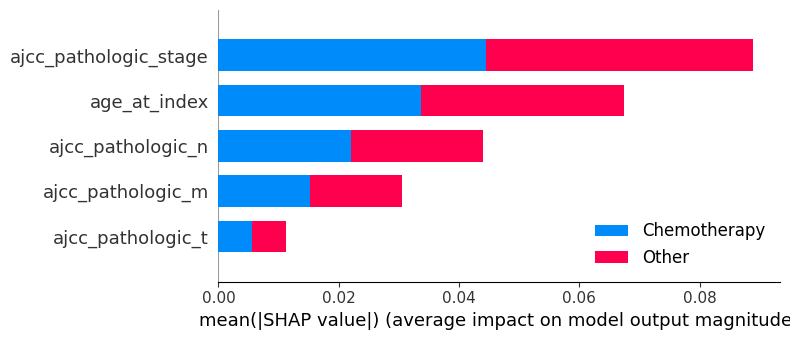

In [24]:
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=['Chemotherapy','Other'])

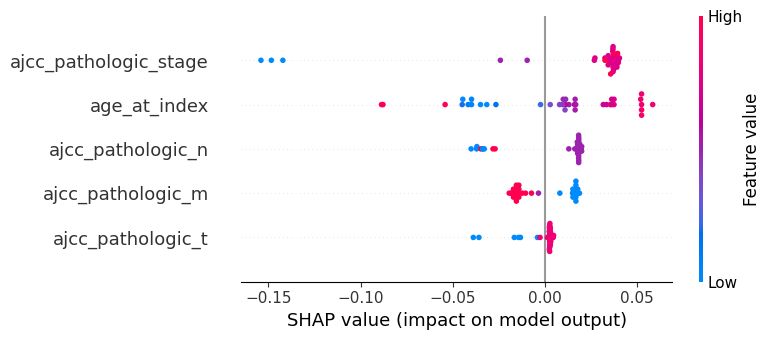

In [25]:
# Summary plot in an individual sample
shap.summary_plot(shap_values[0], X_test)

The **partial dependence plot** is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.

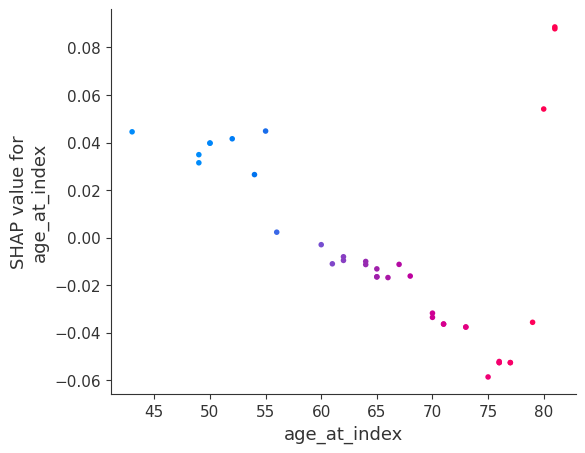

In [26]:
shap.dependence_plot('age_at_index', shap_values[1], X_test, interaction_index='age_at_index')

A continuación incluimos un gráfico de decisión:

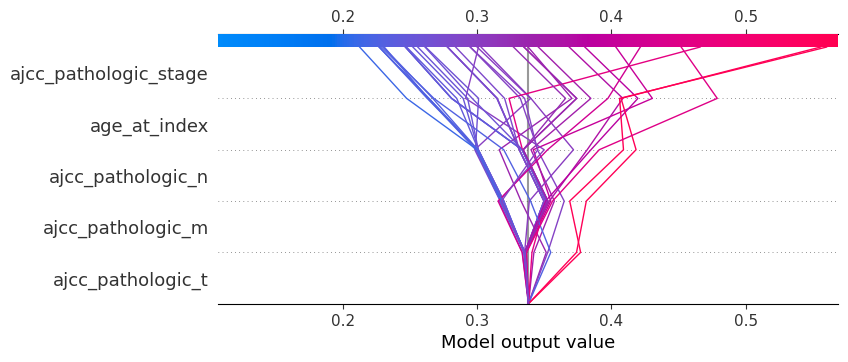

In [27]:
i=1
shap.decision_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

Y finalmente un gráfico de fuerzas:

In [28]:
shap.initjs()
i = 1
shap.force_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

# Explainability with LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a method for explaining the predictions of any classifier and regressor (model agnostic).

In [29]:
# Install SHAP (SHapley Additive exPlanations).
!pip install lime

# Import required libraries
from lime.lime_tabular import LimeTabularExplainer

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


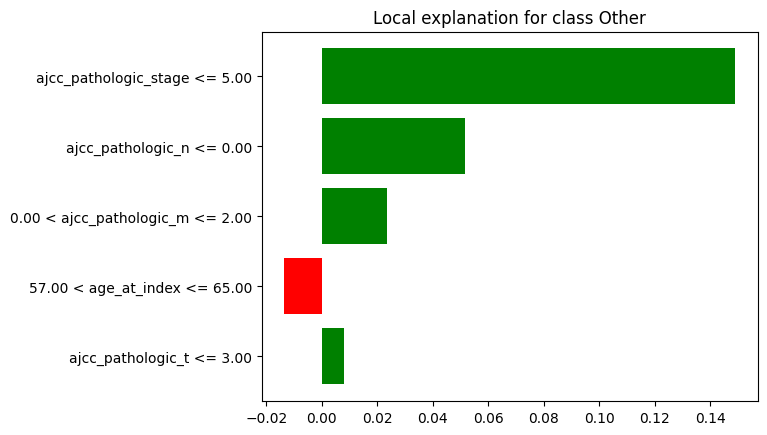

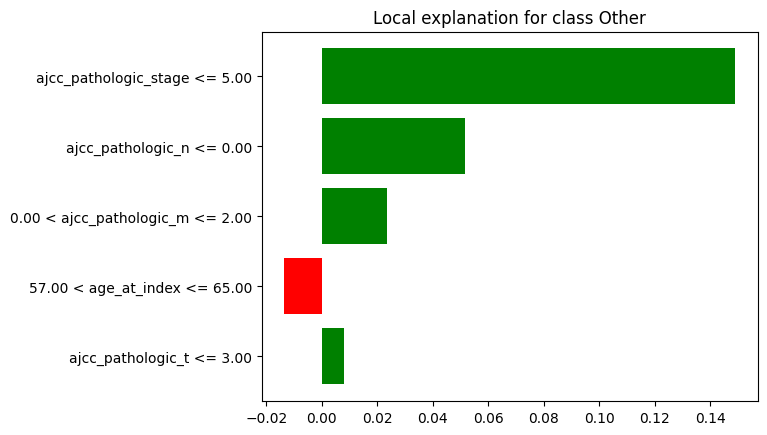

In [30]:
# XAI with LIME (Local Interpretable Model-agnostic Explanations)
explainerLime = LimeTabularExplainer(X_encoded.values, feature_names=X_encoded.columns, class_names = ['Chemotherapy', 'Other'], discretize_continuous=True)
#explainer2 = LimeTabularExplainer(X_encoded.values[:,:], feature_names = X_encoded.columns,class_names=['Chemotherapy','Other'], discretizer='decile',kernel_width=5,discretize_continuous=True,verbose=True)

# Patient 3 LIME explanation
expPatient3 = explainerLime.explain_instance(X_encoded.values[2], rf_clf.predict_proba, num_features=10, top_labels=5)
#exp2 = explainer2.explain_instance(X_encoded.iloc[1,:],rf_clf.predict_proba)

expPatient3.show_in_notebook(show_all=True)
expPatient3.as_pyplot_figure()


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


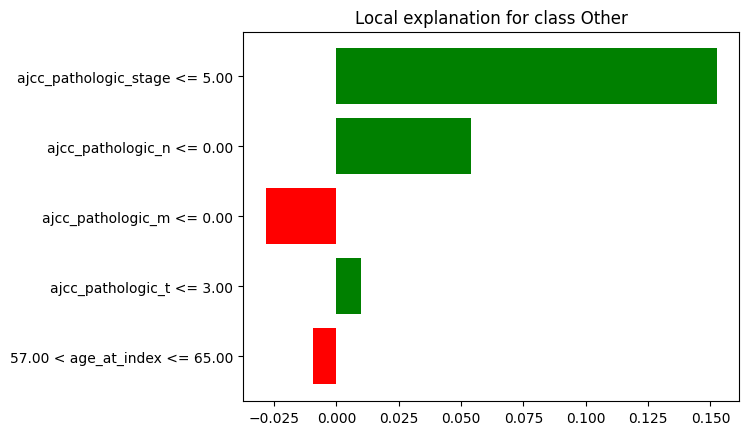

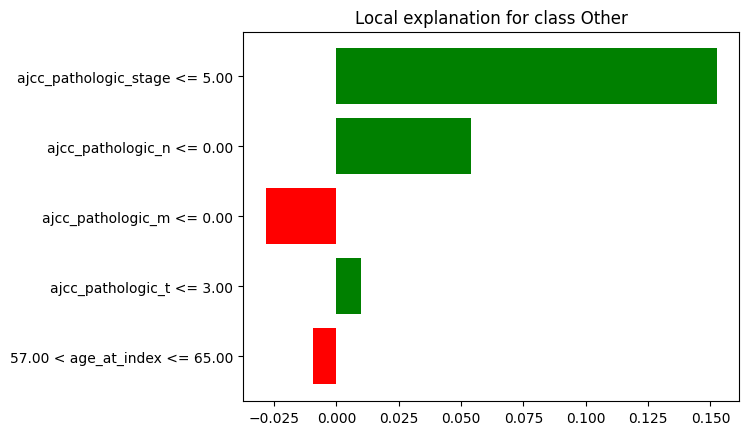

In [31]:
# Patient 4 LIME explanation
expPatient4 = explainerLime.explain_instance(X_encoded.values[3], rf_clf.predict_proba, num_features=10, top_labels=3)
expPatient4.show_in_notebook(show_all=True)
expPatient4.as_pyplot_figure()

# Misceláneo

We include below some information extracted using nice python libraries:


1. Sweetviz
2. Explainer Dashboard (Not yet)
3. Lazy Predict




## Sweetviz

In [32]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.1 MB/s eta 0:00:00


In [33]:
import sweetviz

report = sweetviz.analyze(dataset)

                                             |          | [  0%]   00:00 -> (? left)


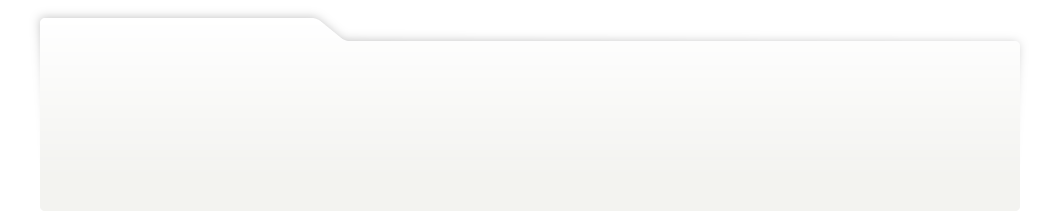
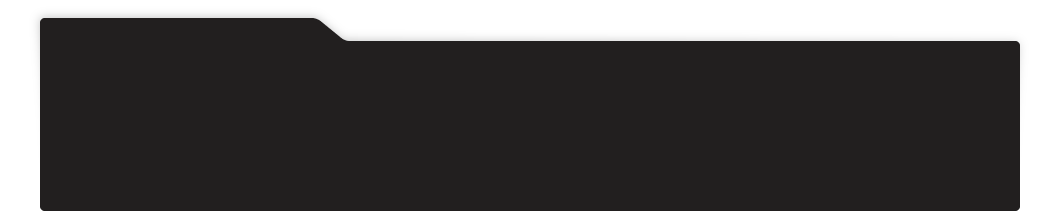
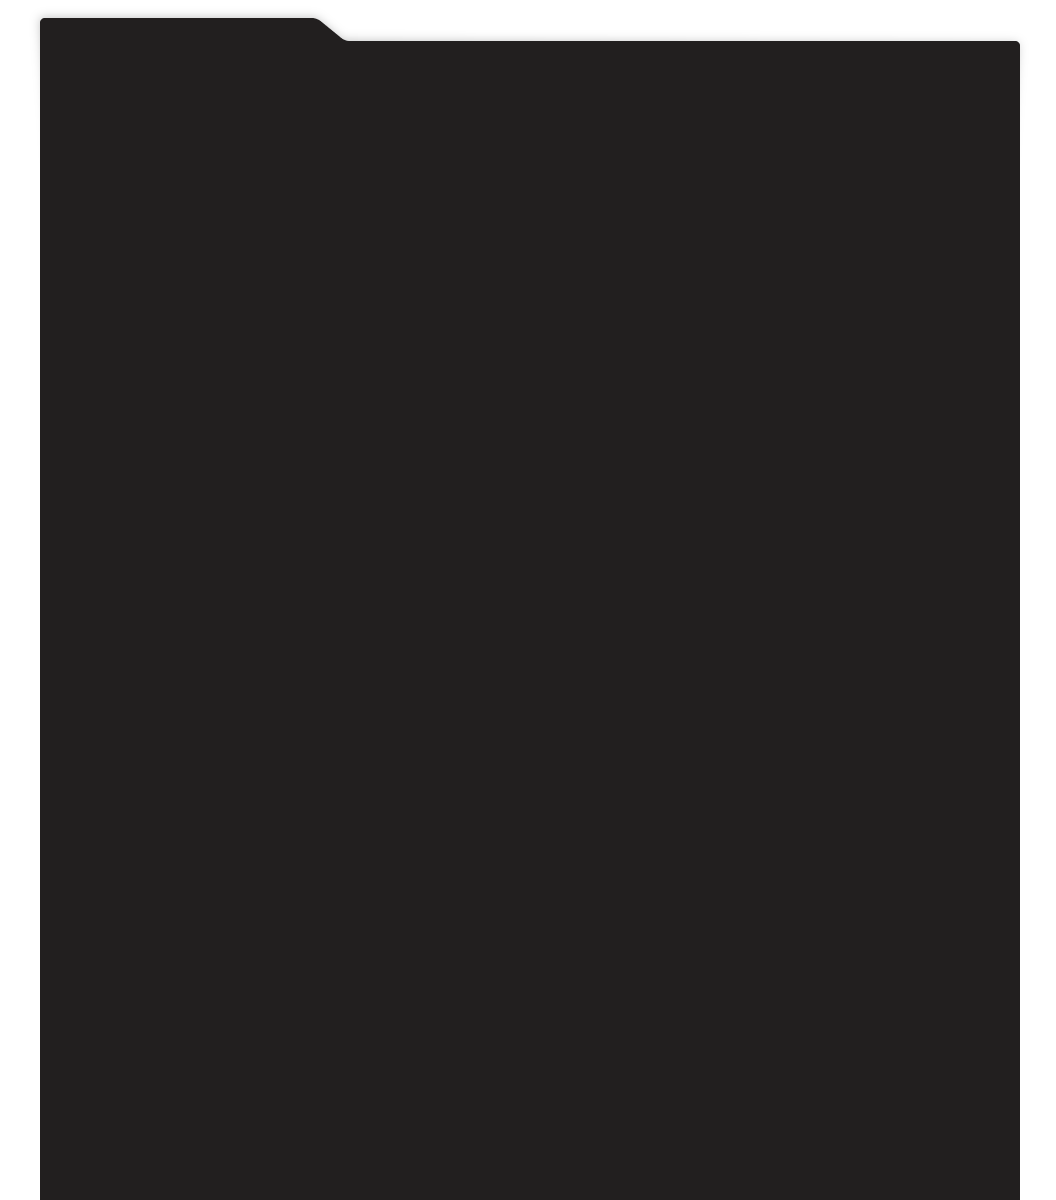
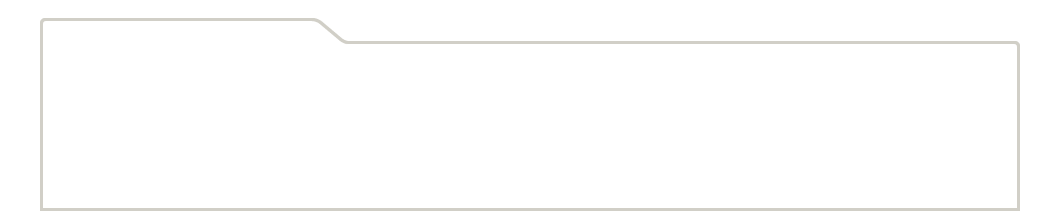
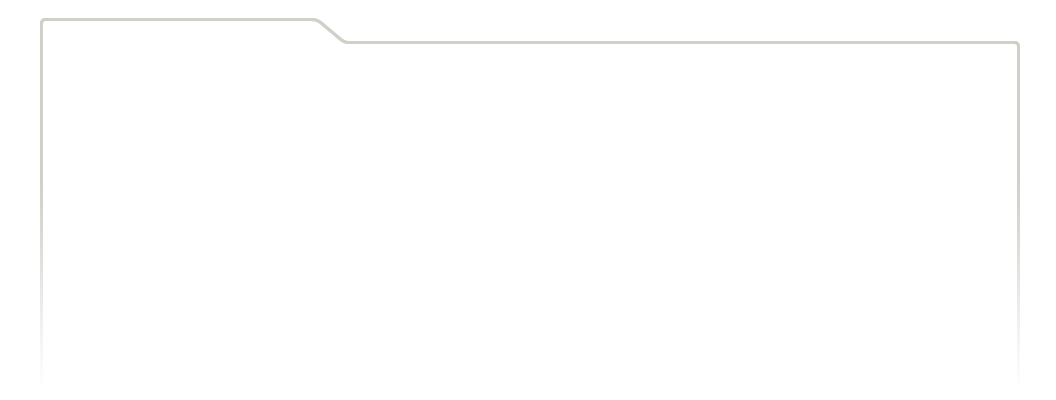
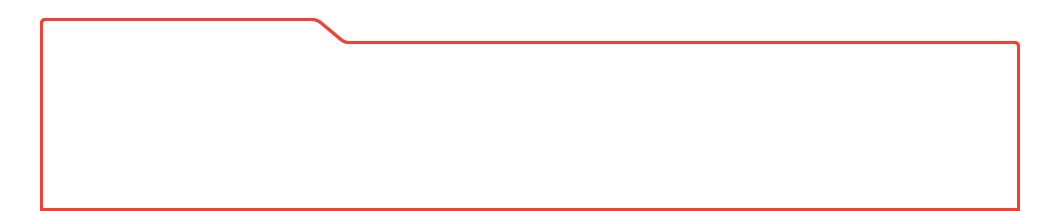
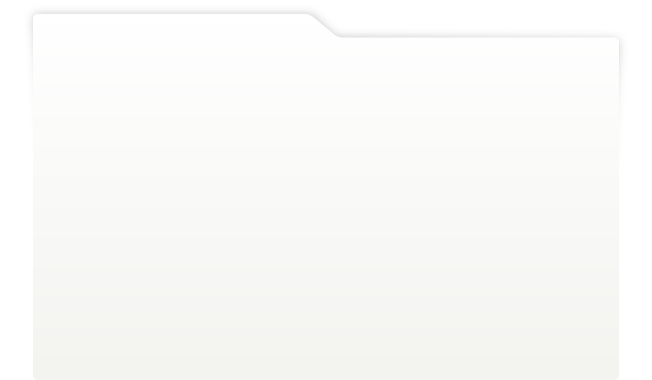
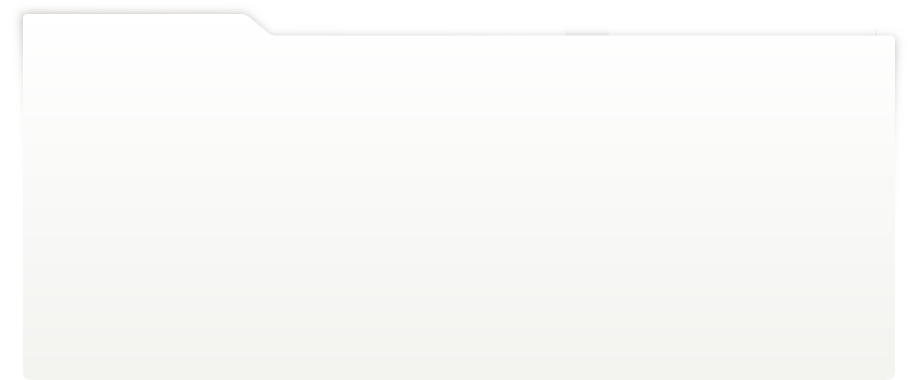
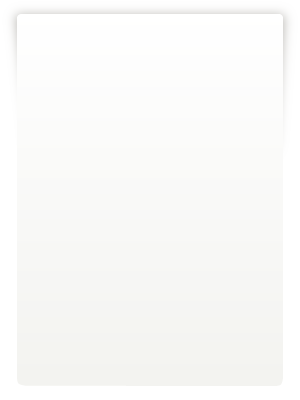
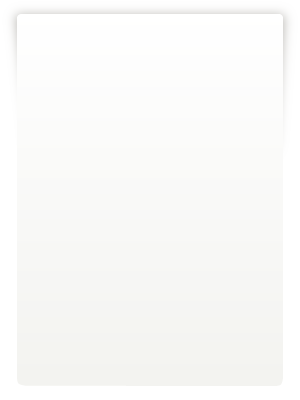
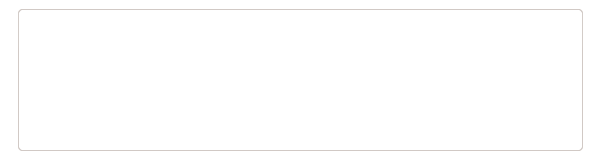
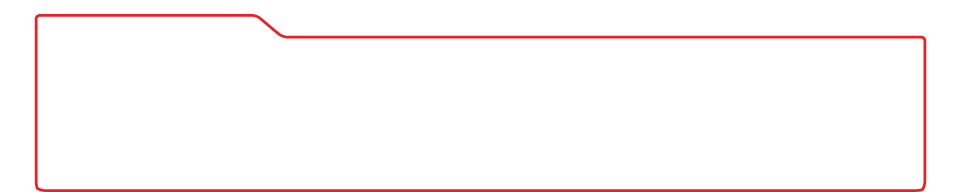
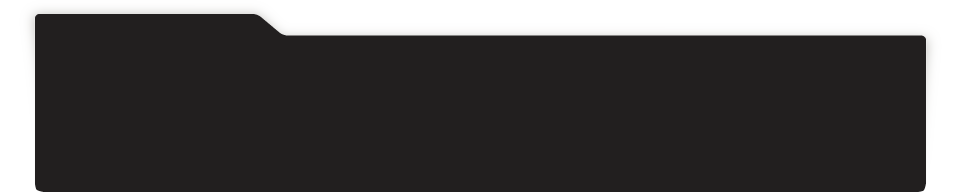
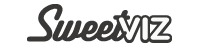
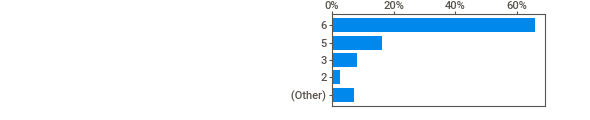
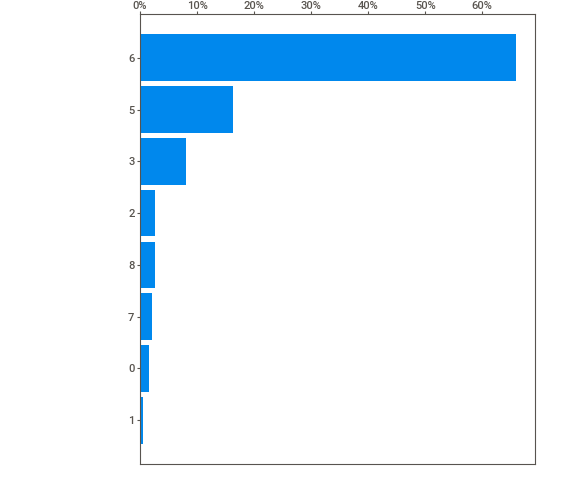
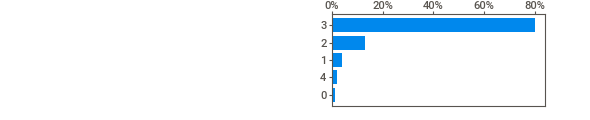
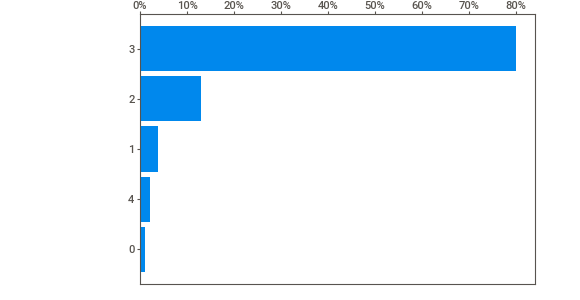
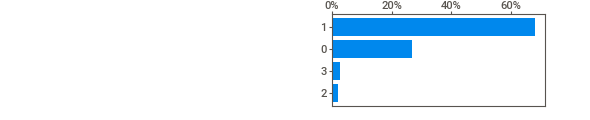
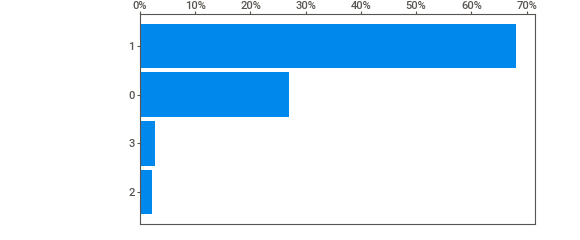
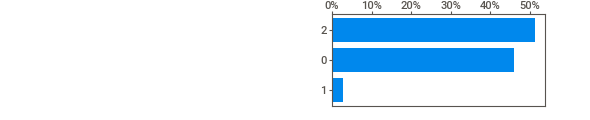
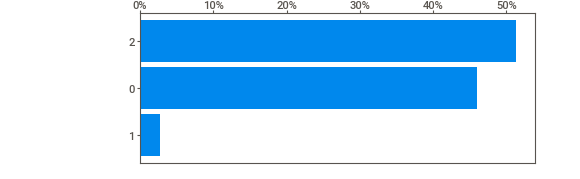
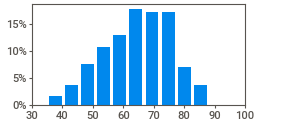
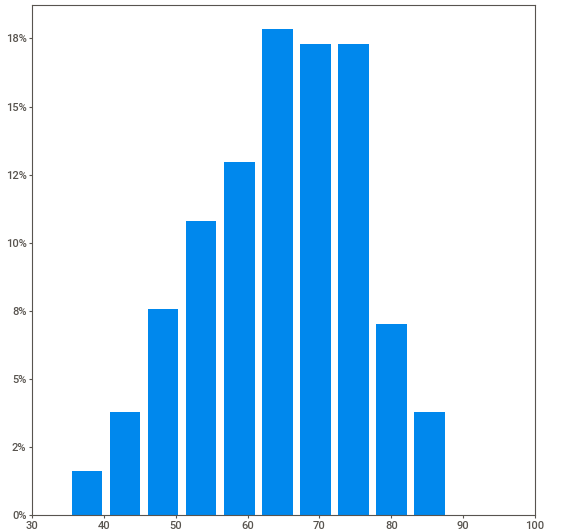
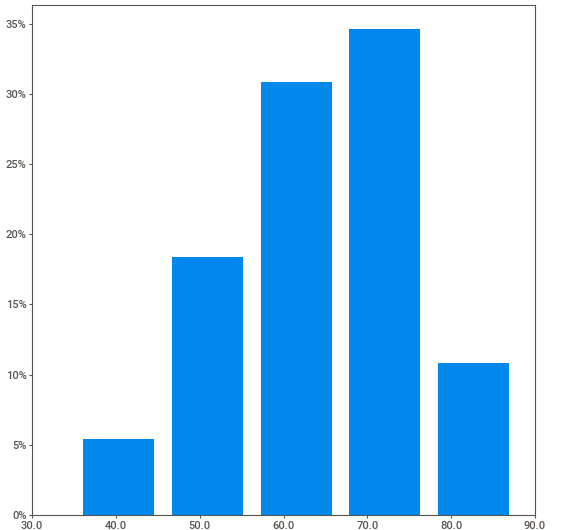
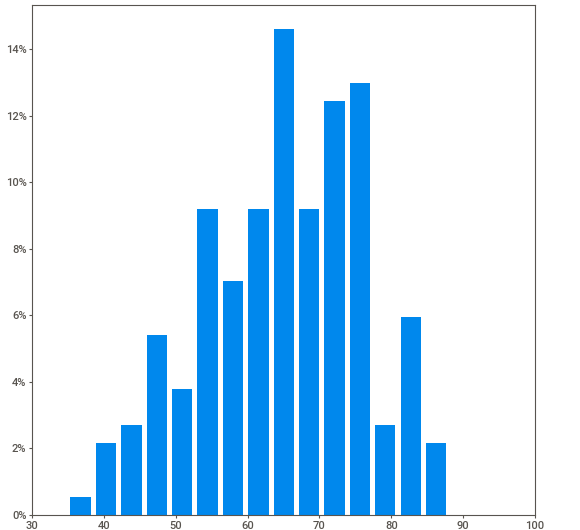
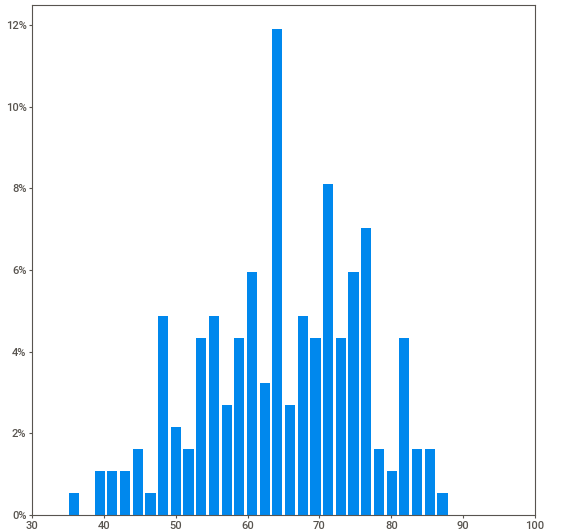
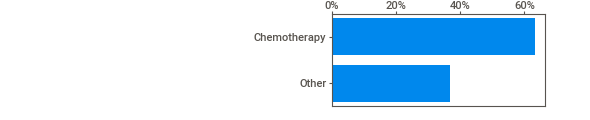
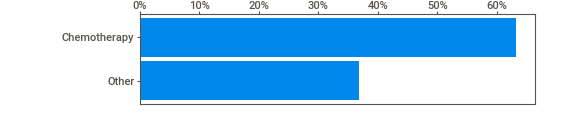
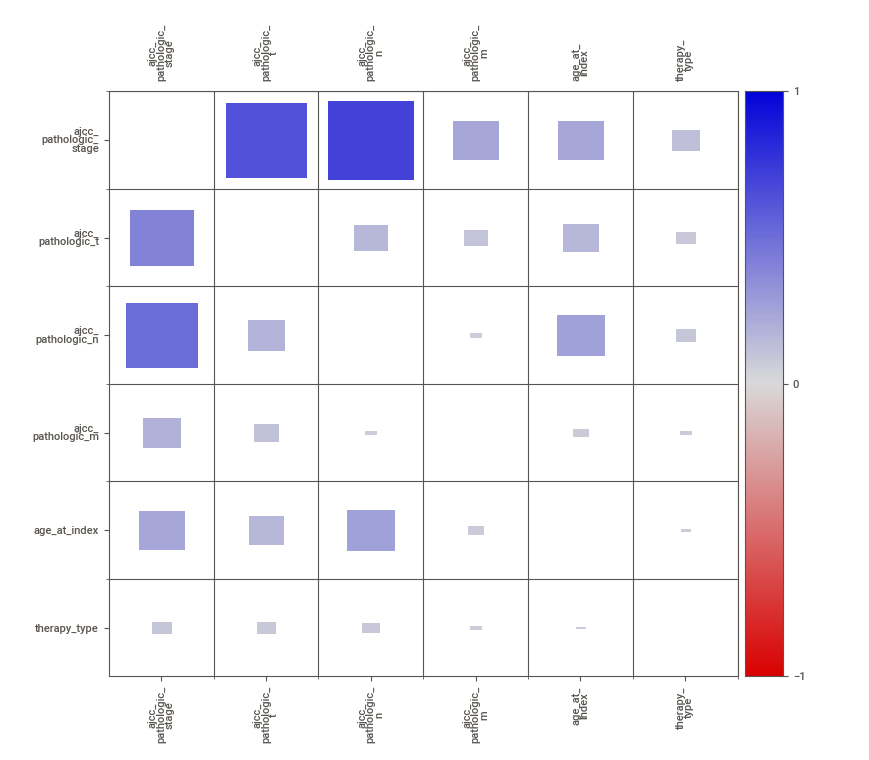
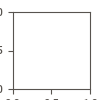

In [34]:
#To save the HTML format of the report, use this:
#report.show_html()

#To view the report inside a Jupyter Notebook, use this:
report.show_notebook()

## Lazy Predict

Lazy Predict ranks the machine learning models that will most likely be suitable.

In [35]:
!pip install lazypredict

In [36]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
lc_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

#Training the models
models,predictions = lc_clf.fit(X_train, X_test, y_train, y_test)

# Printing the output
models

100%|██████████| 29/29 [00:02<00:00, 10.95it/s]

[LightGBM] [Info] Number of positive: 49, number of negative: 99
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331081 -> initscore=-0.703300
[LightGBM] [Info] Start training from score -0.703300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreeClassifier                0.68               0.68    None      0.65   
BaggingClassifier                  0.65               0.66    None      0.62   
KNeighborsClassifier               0.62               0.63    None      0.56   
SVC                                0.59               0.60    None      0.54   
GaussianNB                         0.59               0.60    None      0.54   
AdaBoostClassifier                 0.59               0.60    None      0.56   
DecisionTreeClassifier             0.59               0.60    None      0.59   
RandomForestClassifier             0.59               0.60    None      0.59   
Perceptron                         0.59               0.60    None      0.59   
NearestCentroid                    0.57               0.58    None      0.50   
NuSVC                              0.57               0.58    None      0.52   
RidgeClassifierCV                  0.54               0.55    None      0.43   
RidgeClassifier                    0.54               0.55    None      0.43   
LogisticRegression                 0.54               0.55    None      0.43   
LinearSVC                          0.54               0.55    None      0.43   
LinearDiscriminantAnalysis         0.54               0.55    None      0.43   
ExtraTreesClassifier               0.54               0.55    None      0.53   
CalibratedClassifierCV             0.51               0.53    None      0.38   
BernoulliNB                        0.51               0.52    None      0.41   
PassiveAggressiveClassifier        0.51               0.52    None      0.44   
LGBMClassifier                     0.51               0.52    None      0.44   
DummyClassifier                    0.49               0.50    None      0.32   
QuadraticDiscriminantAnalysis      0.49               0.50    None      0.42   
SGDClassifier                      0.49               0.49    None      0.44   

                               Time Taken  
Model                                      
ExtraTreeClassifier                  0.03  
BaggingClassifier                    0.07  
KNeighborsClassifier                 0.03  
SVC                                  0.08  
GaussianNB                           0.05  
AdaBoostClassifier                   0.25  
DecisionTreeClassifier               0.06  
RandomForestClassifier               0.49  
Perceptron                           0.07  
NearestCentroid                      0.09  
NuSVC                                0.09  
RidgeClassifierCV                    0.07  
RidgeClassifier                      0.05  
LogisticRegression                   0.04  
LinearSVC                            0.08  
LinearDiscriminantAnalysis           0.06  
ExtraTreesClassifier                 0.26  
CalibratedClassifierCV               0.13  
BernoulliNB                          0.04  
PassiveAggressiveClassifier          0.06  
LGBMClassifier                       0.23  
DummyClassifier                      0.04  
QuadraticDiscriminantAnalysis        0.03  
SGDClassifier                        0.04

## FLAML

FLAML allows us to compare different machine-learning models and helps us tune the hyperparameters and select the best model.

In [37]:
pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 4.9 MB/s eta 0:00:00


In [38]:
from flaml import AutoML

In [39]:
automl = AutoML()

# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
    "estimator_list": ['rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']  # list of ML learners
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 01-10 01:04:03] {1679} INFO - task = classification
[flaml.automl.logger: 01-10 01:04:03] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 01-10 01:04:03] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 01-10 01:04:03] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 01-10 01:04:03] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 01-10 01:04:03] {2344} INFO - Estimated sufficient time budget=2231s. Estimated necessary time budget=26s.
[flaml.automl.logger: 01-10 01:04:03] {2391} INFO -  at 0.3s,	estimator rf's best error=0.3515,	best estimator rf's best error=0.3515
[flaml.automl.logger: 01-10 01:04:03] {2218} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 01-10 01:04:03] {2391} INFO -  at 0.4s,	estimator xgboost's best error=0.3310,	best estimator xgboost's best error=0.3310
[flaml.automl.logger: 01-10 01:04:03] {

In [40]:
automl.predict_proba(X_train)

array([[0.7211379 , 0.27886212],
       [0.7211379 , 0.27886212],
       [0.531525  , 0.46847495],
       [0.7211379 , 0.27886212],
       [0.48306334, 0.51693666],
       [0.7211379 , 0.27886212],
       [0.48306334, 0.51693666],
       [0.59461915, 0.40538087],
       [0.7712224 , 0.22877759],
       [0.7211379 , 0.27886212],
       [0.58689135, 0.41310865],
       [0.7211379 , 0.27886212],
       [0.61016345, 0.38983658],
       [0.59461915, 0.40538087],
       [0.58689135, 0.41310865],
       [0.3935619 , 0.6064381 ],
       [0.7211379 , 0.27886212],
       [0.6926613 , 0.30733868],
       [0.59461915, 0.40538087],
       [0.7712224 , 0.22877759],
       [0.58689135, 0.41310865],
       [0.58689135, 0.41310865],
       [0.7712224 , 0.22877759],
       [0.58689135, 0.41310865],
       [0.6926613 , 0.30733868],
       [0.7712224 , 0.22877759],
       [0.7712224 , 0.22877759],
       [0.7211379 , 0.27886212],
       [0.3935619 , 0.6064381 ],
       [0.47594023, 0.5240598 ],
       [0.

In [41]:
# Print the best model
print(automl.model.estimator)

XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.25912534572860507,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=4,
              min_child_weight=0.26208115308159446, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=4,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)


In [42]:
print(automl.best_estimator)
print(automl.best_config)

xgboost
{'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.26208115308159446, 'learning_rate': 0.25912534572860507, 'subsample': 0.9266743941610592, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013933617380144255, 'reg_lambda': 0.18096917948292954}
